## Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
from google.colab import drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the dataset
credit = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [5]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
credit.shape

(284807, 31)

In [7]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
print("\nClass distribution:")
print(credit['Class'].value_counts())


Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64


In [10]:
credit.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


## Exploration

In [11]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [12]:
fraud_times = credit[credit['Class'] == 1]['Time']
non_fraud_times = credit[credit['Class'] == 0]['Time']
time_range = np.linspace(0, credit['Time'].max(), 200)
fraud_density = gaussian_kde(fraud_times)(time_range)
non_fraud_density = gaussian_kde(non_fraud_times)(time_range)

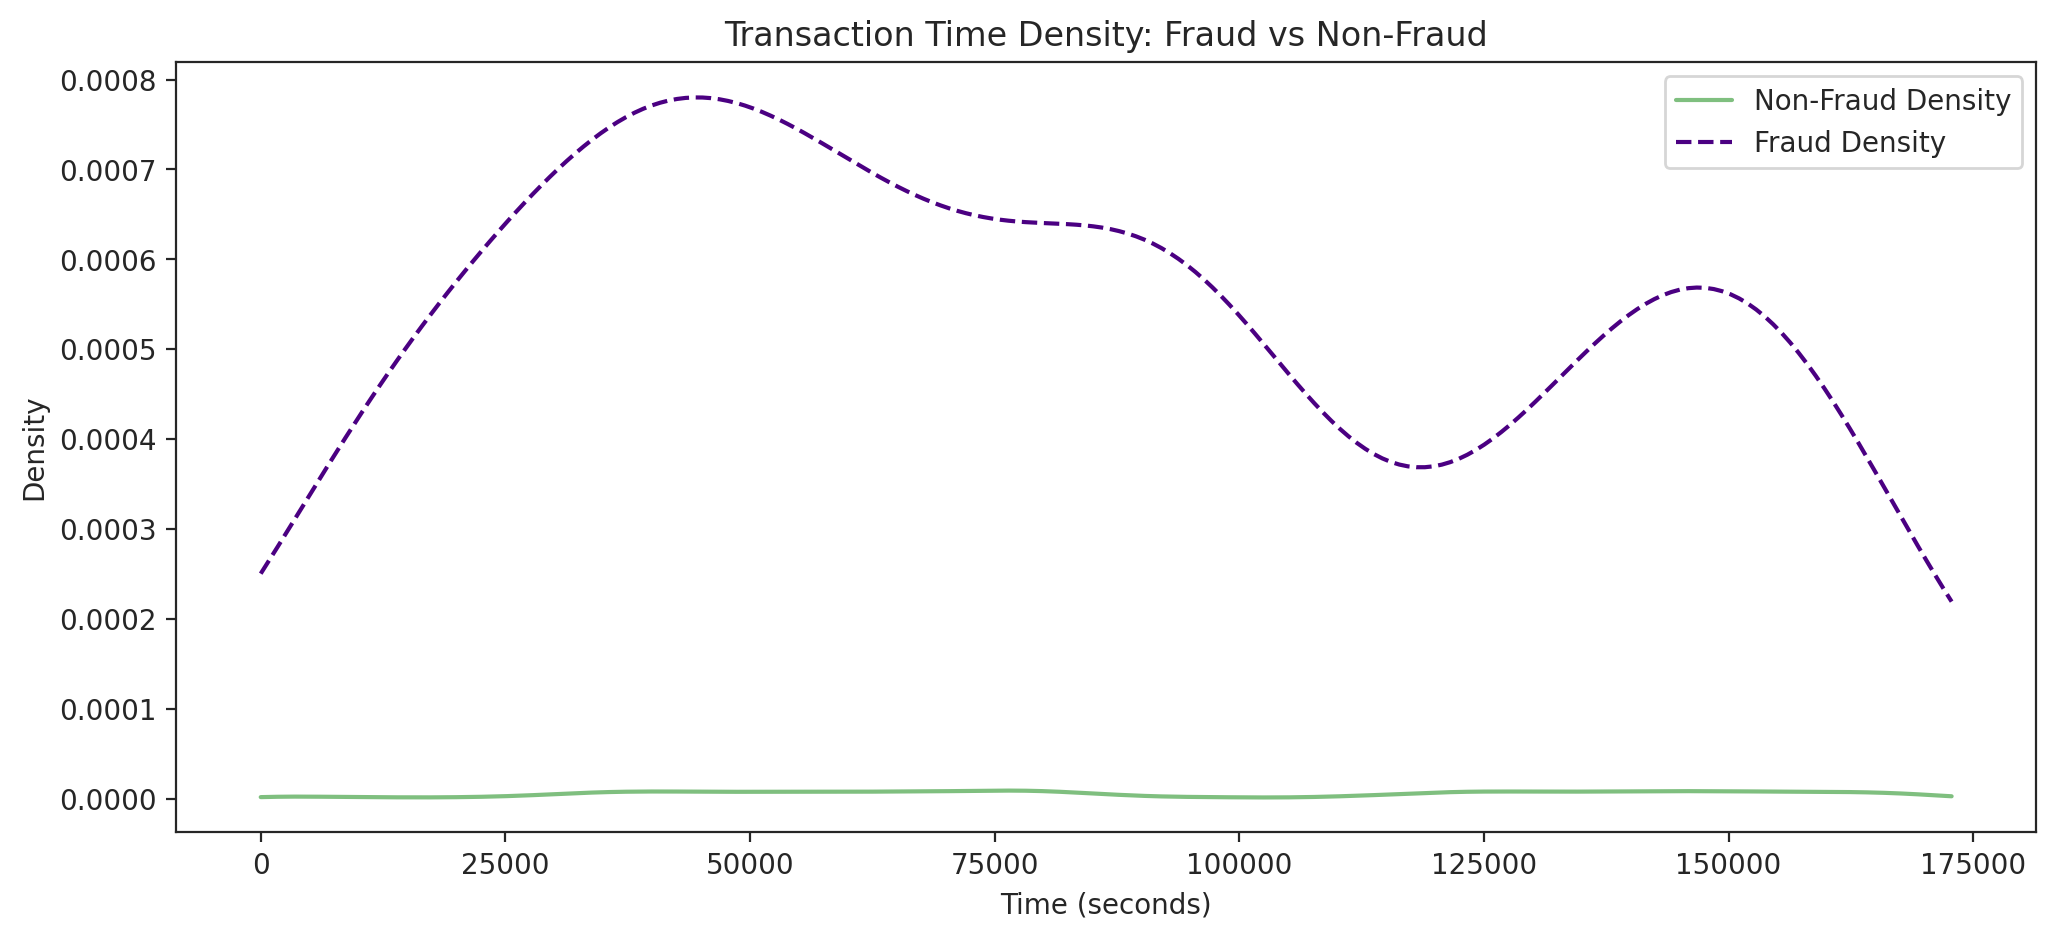

In [13]:
plt.figure(figsize=(12, 5))
plt.plot(time_range, non_fraud_density, label='Non-Fraud Density', color='green', alpha=0.5)
plt.plot(time_range, fraud_density * 100, label='Fraud Density', color='indigo', linestyle='--')
plt.title('Transaction Time Density: Fraud vs Non-Fraud')
plt.xlabel('Time (seconds)')
plt.ylabel('Density')
plt.legend()
plt.show()

In [14]:
# Time Gap Analysis
credit_sorted = credit.sort_values('Time')
time_gaps = credit_sorted['Time'].diff()
fraud_gaps = time_gaps[credit_sorted['Class'] == 1]

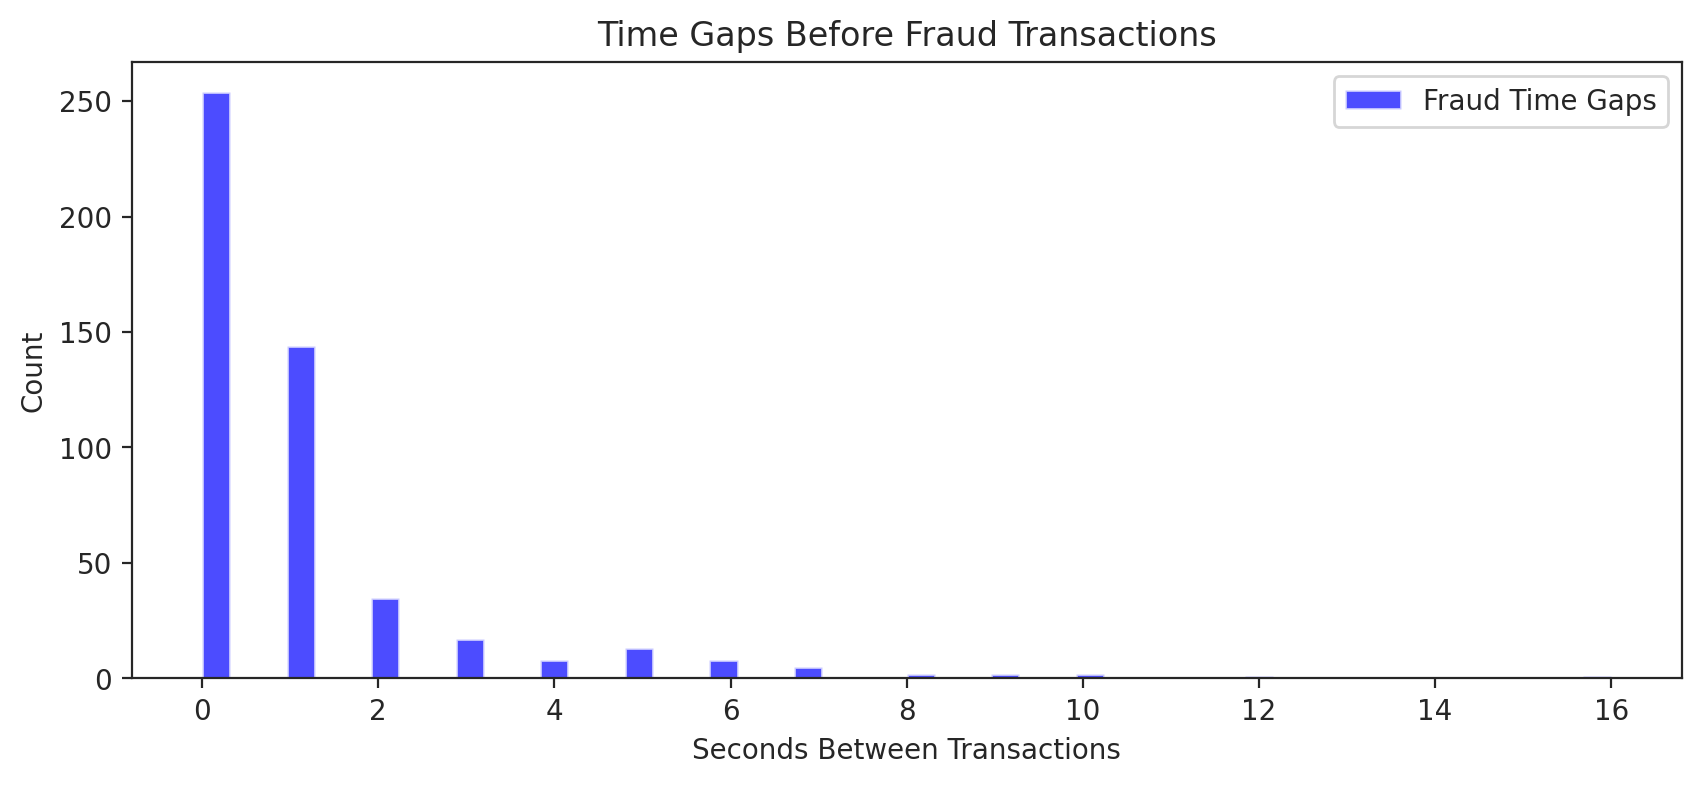

In [15]:
plt.figure(figsize=(10, 4))
plt.hist(fraud_gaps.dropna(), bins=50, color='blue', alpha=0.7, label='Fraud Time Gaps')
plt.title('Time Gaps Before Fraud Transactions')
plt.xlabel('Seconds Between Transactions')
plt.ylabel('Count')
plt.legend()
plt.show()

In [16]:
# Amount Cumulative Share
credit_sorted_amount = credit.sort_values('Amount')
cumulative_amount = credit_sorted_amount['Amount'].cumsum() / credit_sorted_amount['Amount'].sum()
fraud_idx = credit_sorted_amount['Class'] == 1

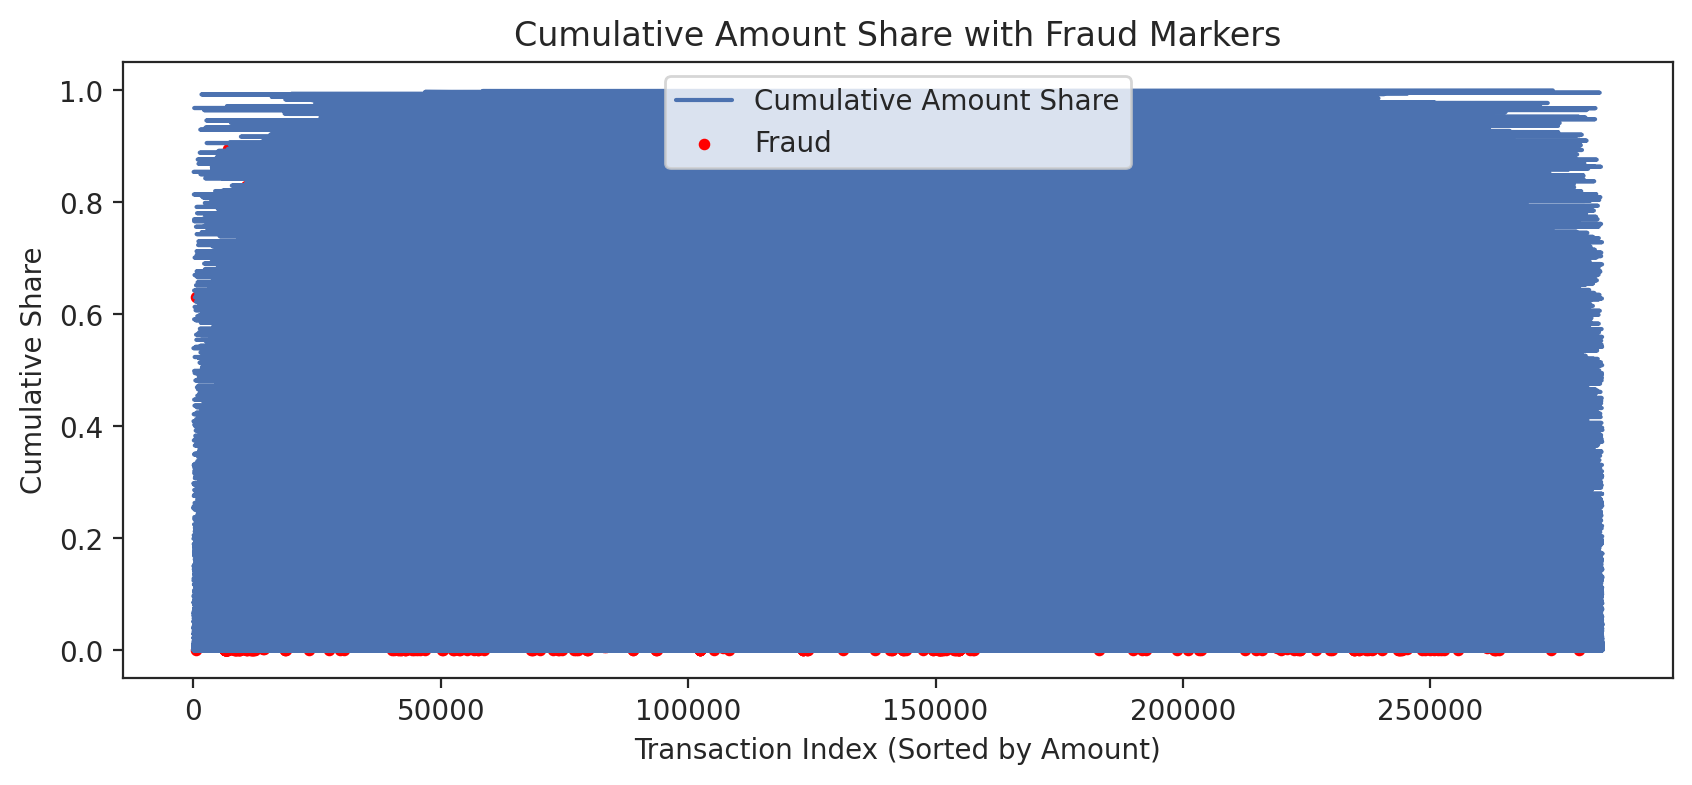

In [17]:
plt.figure(figsize=(10, 4))
plt.plot(cumulative_amount, label='Cumulative Amount Share')
plt.scatter(cumulative_amount.index[fraud_idx], cumulative_amount[fraud_idx], color='red', s=10, label='Fraud')
plt.title('Cumulative Amount Share with Fraud Markers')
plt.xlabel('Transaction Index (Sorted by Amount)')
plt.ylabel('Cumulative Share')
plt.legend()
plt.show()

In [18]:
# V-Feature Fraud Spike Detector
v_cols = [col for col in credit.columns if col.startswith('V')]
fraud_spikes = credit[credit['Class'] == 1][v_cols].abs().mean() / credit[v_cols].abs().mean()
print("\nV-Feature Spike Ratios (Fraud vs All):")
print(fraud_spikes.sort_values(ascending=False).head())


V-Feature Spike Ratios (Fraud vs All):
V17    13.233282
V14    10.867715
V12     8.952871
V10     8.364735
V7      8.039595
dtype: float64


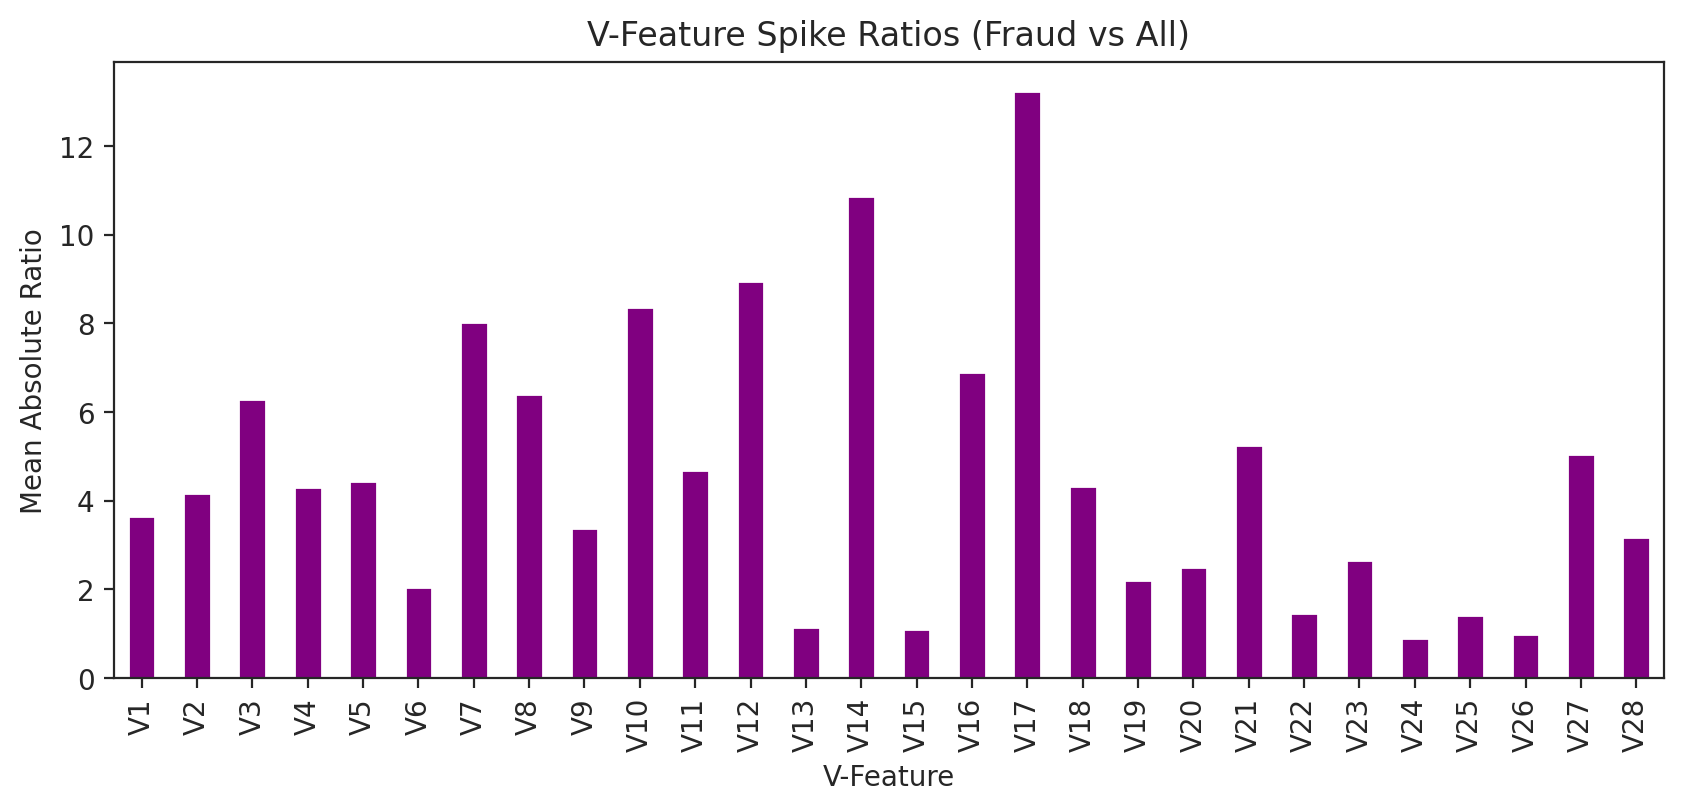

In [19]:
plt.figure(figsize=(10, 4))
fraud_spikes.plot(kind='bar', color='purple')
plt.title('V-Feature Spike Ratios (Fraud vs All)')
plt.xlabel('V-Feature')
plt.ylabel('Mean Absolute Ratio')
plt.show()

## Preprocessing

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# Data Splitting
X = credit.drop('Class', axis=1)
y = credit['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [22]:
# V17-Boosted Feature
threshold = X_train['V17'].abs().quantile(0.95)
X_train['V17_boost'] = X_train['V17'].where(X_train['V17'].abs() > threshold, 0)
X_test['V17_boost'] = X_test['V17'].where(X_test['V17'].abs() > X_test['V17'].abs().quantile(0.95), 0)

In [23]:
# Time Cycle for 48-hour
X_train['Time_cycle'] = np.sin(2 * np.pi * X_train['Time'] / (48 * 3600))
X_test['Time_cycle'] = np.sin(2 * np.pi * X_test['Time'] / (48 * 3600))

In [24]:
# Amount Log with Cap
X_train['Log_Amount'] = np.log1p(X_train['Amount'].clip(upper=X_train['Amount'].quantile(0.99)))
X_test['Log_Amount'] = np.log1p(X_test['Amount'].clip(upper=X_test['Amount'].quantile(0.99)))

In [25]:
# Checking for NaNs
print("NaNs in X_train:", X_train.isna().sum().sum())
print("NaNs in X_test:", X_test.isna().sum().sum())
print("New Features Added (With V17, Corrected):")
print(X_train[['V17', 'V17_boost', 'Time_cycle', 'Log_Amount']].head())

NaNs in X_train: 0
NaNs in X_test: 0
New Features Added (With V17, Corrected):
             V17  V17_boost  Time_cycle  Log_Amount
265518 -0.765670        0.0   -0.385403    2.118662
180305 -0.270842        0.0   -0.982700    1.383791
42664  -0.724616        0.0    0.997333    5.171052
198723  0.072781        0.0   -0.993961    1.960095
82325  -0.399525        0.0    0.832297    4.467057


## Imbalance Handling

In [26]:
# Imbalance Handling
fraud_data = X_train[y_train == 1].copy()
fraud_data['V17_weight'] = fraud_data['V17_boost'].abs()

In [27]:
# Handle where V17_boost is all zeros
if fraud_data['V17_weight'].max() == 0:
    print("Warning: V17_boost all zeros for fraud data. Using uniform sampling.")
    sample_probs = np.ones(len(fraud_data)) / len(fraud_data)
else:
    sample_probs = fraud_data['V17_weight'] / fraud_data['V17_weight'].sum()

In [28]:
# Check for NaNs in sample_probs
print("NaNs in sample_probs:", np.isnan(sample_probs).sum())

NaNs in sample_probs: 0


In [29]:
# Oversample fraud
n_samples = int(len(X_train[y_train == 0]) * 0.1)
fraud_oversampled = fraud_data.sample(n_samples, replace=True, weights=sample_probs, random_state=42)

In [30]:
# Check for NaNs in fraud_oversampled
print("NaNs in fraud_oversampled:", fraud_oversampled.isna().sum().sum())
print("Columns in X_train[y_train == 0]:", X_train[y_train == 0].columns.tolist())
print("Columns in fraud_oversampled:", fraud_oversampled.columns.tolist())

NaNs in fraud_oversampled: 0
Columns in X_train[y_train == 0]: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'V17_boost', 'Time_cycle', 'Log_Amount']
Columns in fraud_oversampled: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'V17_boost', 'Time_cycle', 'Log_Amount', 'V17_weight']


In [31]:
# Reset indices and drop V17_weight
non_fraud_data = X_train[y_train == 0].reset_index(drop=True)
fraud_oversampled = fraud_oversampled.reset_index(drop=True)
fraud_oversampled = fraud_oversampled.drop(columns=['V17_weight'])

In [32]:
# Combine
X_train_bal = pd.concat([non_fraud_data, fraud_oversampled], ignore_index=True)
y_train_bal = pd.concat([y_train[y_train == 0].reset_index(drop=True), pd.Series([1] * len(fraud_oversampled))], ignore_index=True)

In [33]:
# Check for NaNs
print("NaNs in X_train[y_train == 0]:", X_train[y_train == 0].isna().sum().sum())
print("NaNs in X_train_bal:", X_train_bal.isna().sum().sum())
print("New Class Distribution:")
print(y_train_bal.value_counts())

NaNs in X_train[y_train == 0]: 0
NaNs in X_train_bal: 0
New Class Distribution:
0    227451
1     22745
Name: count, dtype: int64


## Model Building & Tuning

In [34]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, auc

In [35]:
# Models
qda = QuadraticDiscriminantAnalysis()
lr = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(probability=True, random_state=42)

In [36]:
# Train models
models = {'QDA': qda, 'LR': lr, 'RF': rf, 'SVM': svm}
for name, model in models.items():
    model.fit(X_train_bal, y_train_bal)
    print(f"{name} trained.")

QDA trained.
LR trained.
RF trained.
SVM trained.


In [37]:
# Custom Threshold Optimizer (maximize AUPRC)
def optimize_threshold(model, X, y):
    y_pred_proba = model.predict_proba(X)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y, y_pred_proba)
    pr_auc = auc(recall, precision)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
    best_threshold = thresholds[np.argmax(f1_scores)]
    return best_threshold, pr_auc

In [38]:
# Evaluate on test set
best_thresholds = {}
auprc_scores = {}
for name, model in models.items():
    best_threshold, pr_auc = optimize_threshold(model, X_test, y_test)
    best_thresholds[name] = best_threshold
    auprc_scores[name] = pr_auc
    print(f"{name} - Best Threshold: {best_threshold:.3f}, AUPRC: {pr_auc:.3f}")

QDA - Best Threshold: 1.000, AUPRC: 0.492
LR - Best Threshold: 0.989, AUPRC: 0.740
RF - Best Threshold: 0.560, AUPRC: 0.880
SVM - Best Threshold: 0.846, AUPRC: 0.657


## Evaluation

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
# Define the cost function
def calculate_cost(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    cost = (fn * 500) + (fp * 50)
    return cost

In [41]:
# Evaluate each model using the best threshold
cost_scores = {}
for name, model in models.items():
    best_threshold = best_thresholds[name]
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_proba >= best_threshold).astype(int)

    cost = calculate_cost(y_test, y_pred)
    cost_scores[name] = cost
    print(f"{name} - Total Cost: ${cost:,}, AUPRC: {auprc_scores[name]:.3f}")

QDA - Total Cost: $27,000, AUPRC: 0.492
LR - Total Cost: $9,400, AUPRC: 0.740
RF - Total Cost: $8,650, AUPRC: 0.880
SVM - Total Cost: $12,850, AUPRC: 0.657


In [42]:
# Find the best model based on cost
best_model_name = min(cost_scores, key=cost_scores.get)
print(f"\nBest Model (Lowest Cost): {best_model_name} with Cost: ${cost_scores[best_model_name]:,}")


Best Model (Lowest Cost): RF with Cost: $8,650


## Feature Importance and Model Interpretation

In [43]:
!pip install shap

In [44]:
import matplotlib.pyplot as plt
import shap

In [45]:
# Select the best model (RF)
best_model = models['RF']
print("Analyzing Feature Importance for RF (Best Model)")

Analyzing Feature Importance for RF (Best Model)


In [46]:
# Feature Importance
feature_importance = best_model.feature_importances_
feature_names = X_train_bal.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

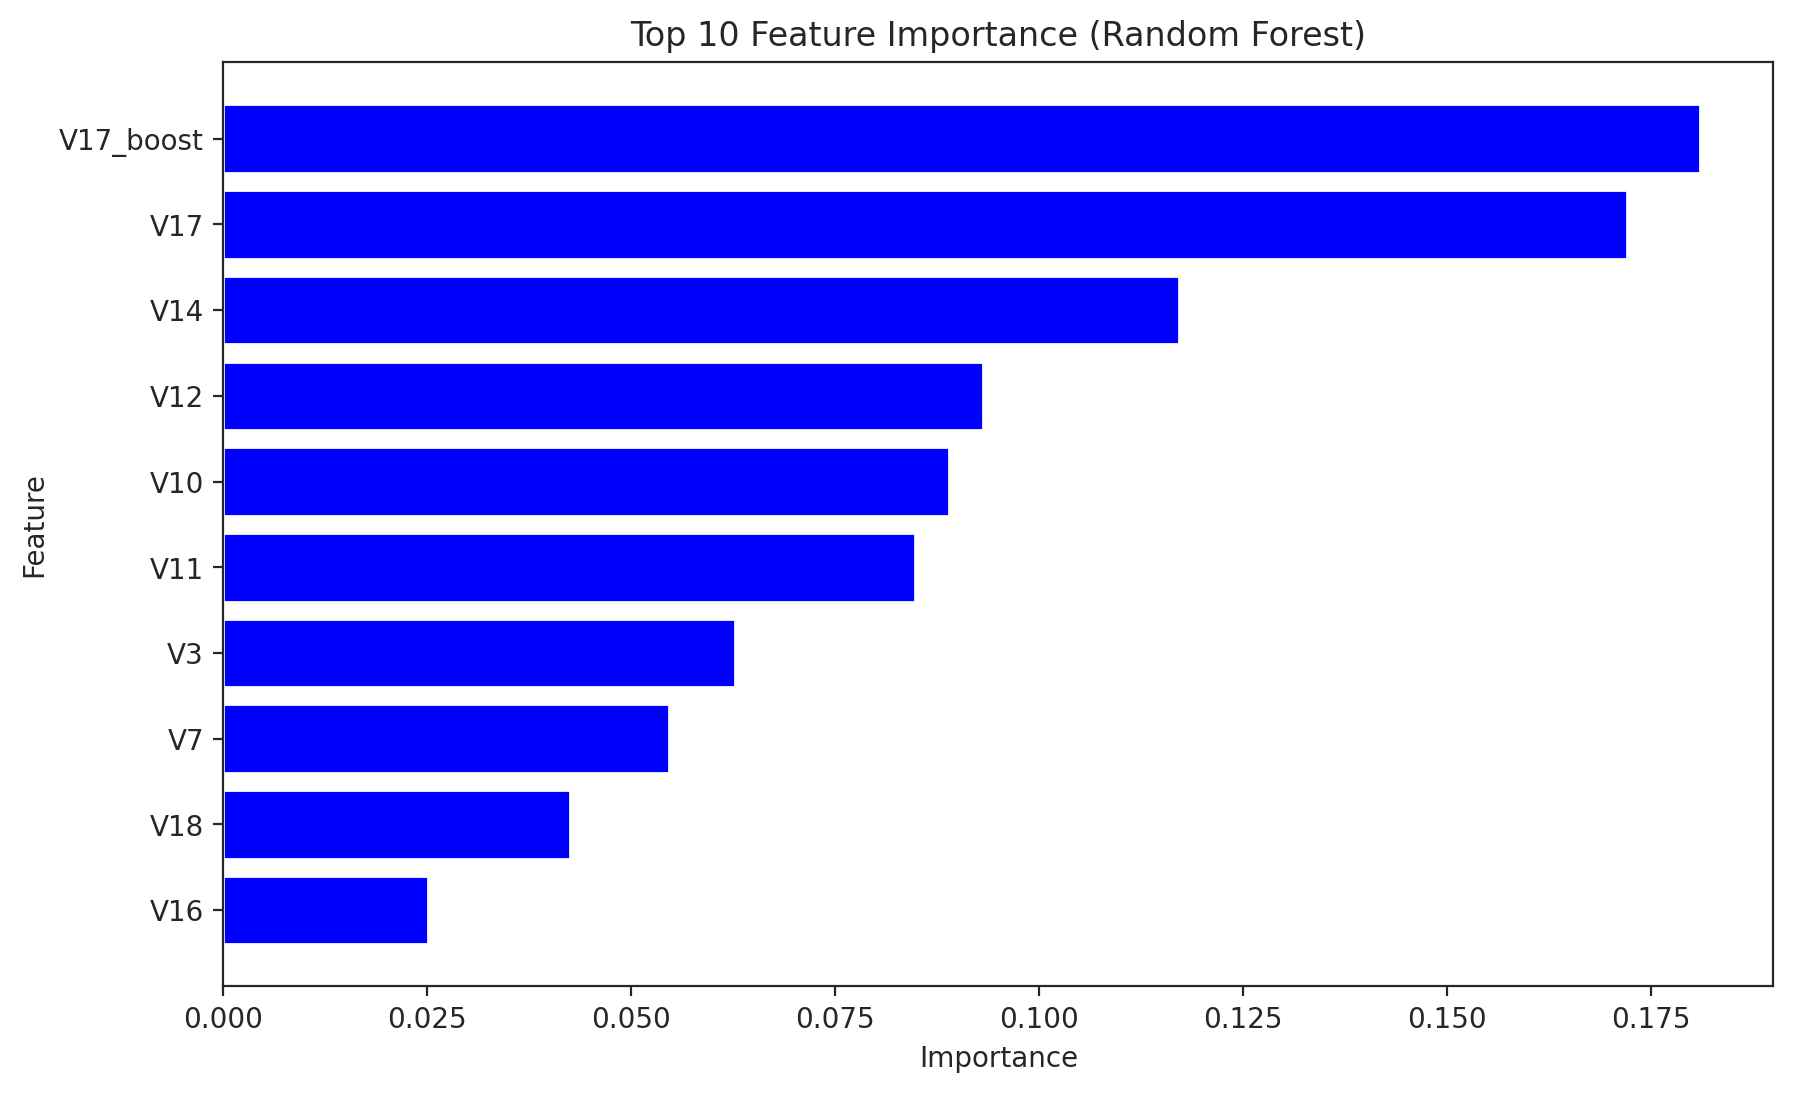

In [47]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='blue')
plt.title('Top 10 Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

In [48]:
print("\nTop 10 Features by Importance:")
print(importance_df.head(10))


Top 10 Features by Importance:
      Feature  Importance
30  V17_boost    0.180929
17        V17    0.172074
14        V14    0.117176
12        V12    0.093089
10        V10    0.088889
11        V11    0.084722
3          V3    0.062639
7          V7    0.054615
18        V18    0.042443
16        V16    0.025014


In [49]:
# SHAP Analysis (for deeper interpretation)
# Use a smaller subset of the test set for SHAP
X_test_sample = X_test.sample(1000, random_state=42).copy()

In [50]:
# Shapes and features
print("\nShape of X_train_bal (training data):", X_train_bal.shape)
print("Shape of X_test (before sampling):", X_test.shape)
print("Shape of X_test_sample (before preprocessing):", X_test_sample.shape)
print("Features in X_train_bal:", X_train_bal.columns.tolist())
print("Features in X_test:", X_test.columns.tolist())
print("Features in X_test_sample:", X_test_sample.columns.tolist())


Shape of X_train_bal (training data): (250196, 33)
Shape of X_test (before sampling): (56962, 33)
Shape of X_test_sample (before preprocessing): (1000, 33)
Features in X_train_bal: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'V17_boost', 'Time_cycle', 'Log_Amount']
Features in X_test: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'V17_boost', 'Time_cycle', 'Log_Amount']
Features in X_test_sample: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'V17_boost', 'Time_cycle', 'Log_Amount']


In [51]:
# Reorder X_test_sample to match X_train_bal's feature order
X_test_sample = X_test_sample[X_train_bal.columns]

In [52]:
# Shapes after reordering
print("\nShape of X_test_sample (after reordering):", X_test_sample.shape)
print("Features in X_test_sample (after reordering):", X_test_sample.columns.tolist())


Shape of X_test_sample (after reordering): (1000, 33)
Features in X_test_sample (after reordering): ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'V17_boost', 'Time_cycle', 'Log_Amount']


In [53]:
# Initialize SHAP explainer for RF
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test_sample)

In [54]:
# SHAP values shape
print("Length of shap_values:", len(shap_values))
print("Shape of shap_values[0] (non-fraud class):", np.array(shap_values[0]).shape)
print("Shape of shap_values[1] (fraud class):", np.array(shap_values[1]).shape)

Length of shap_values: 1000
Shape of shap_values[0] (non-fraud class): (33, 2)
Shape of shap_values[1] (fraud class): (33, 2)



SHAP Summary Plot (Impact on Fraud Prediction):


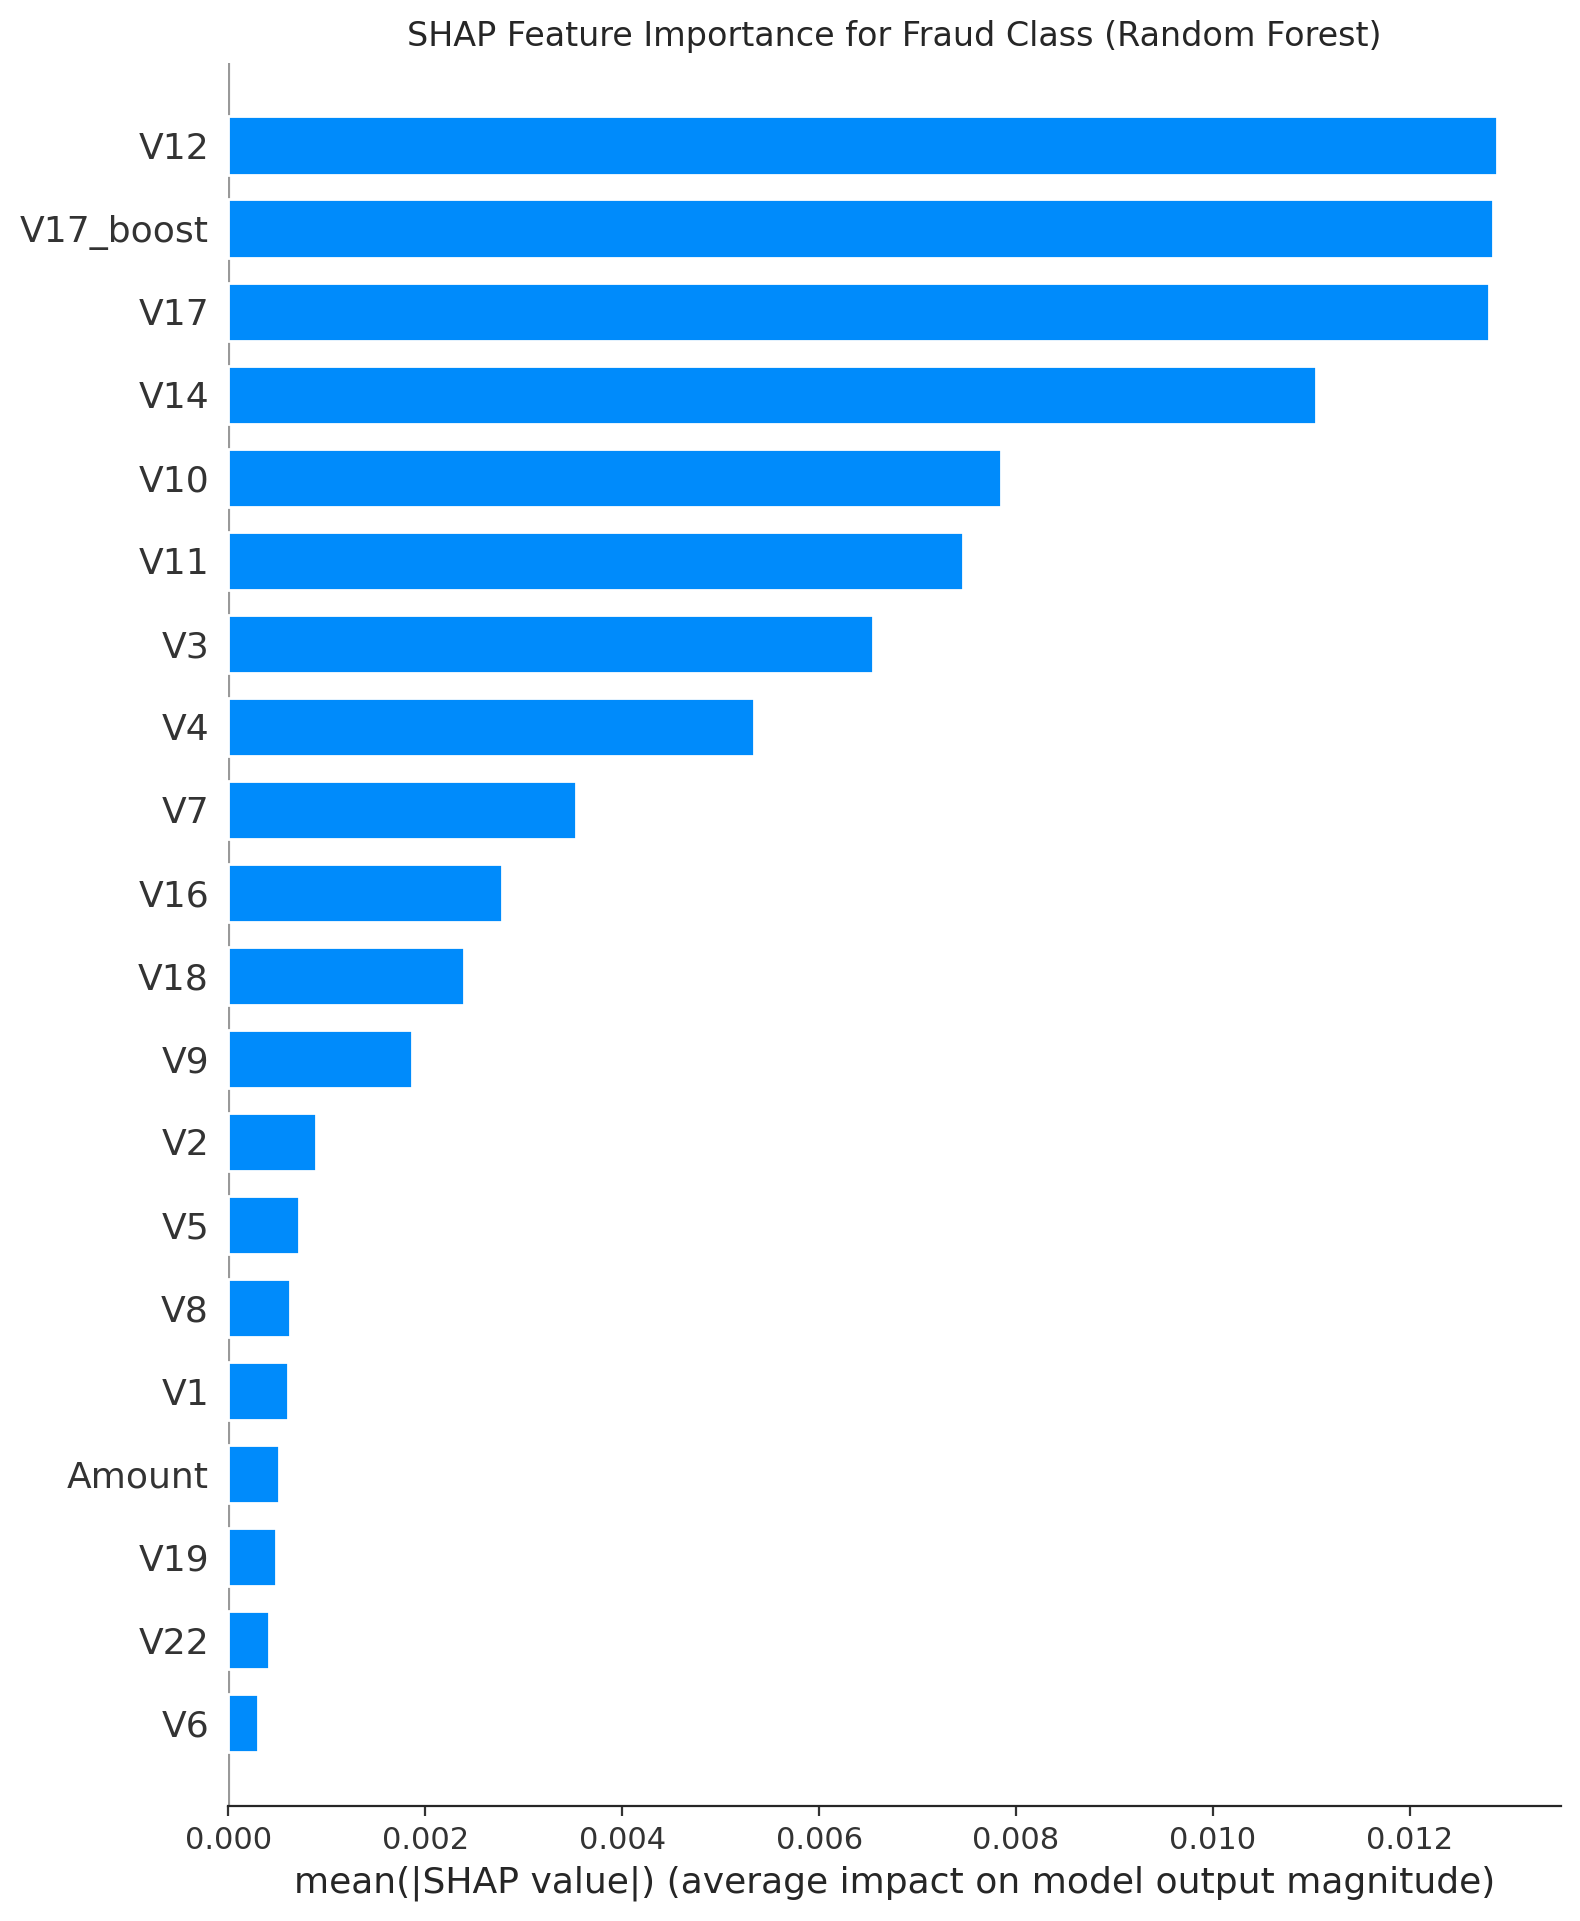

In [55]:
# Plot SHAP summary
print("\nSHAP Summary Plot (Impact on Fraud Prediction):")
shap_values_fraud = shap_values[:, :, 1]
shap.summary_plot(shap_values_fraud, X_test_sample, plot_type="bar", show=False)
plt.title('SHAP Feature Importance for Fraud Class (Random Forest)')
plt.show()


SHAP Summary Plot (Detailed):


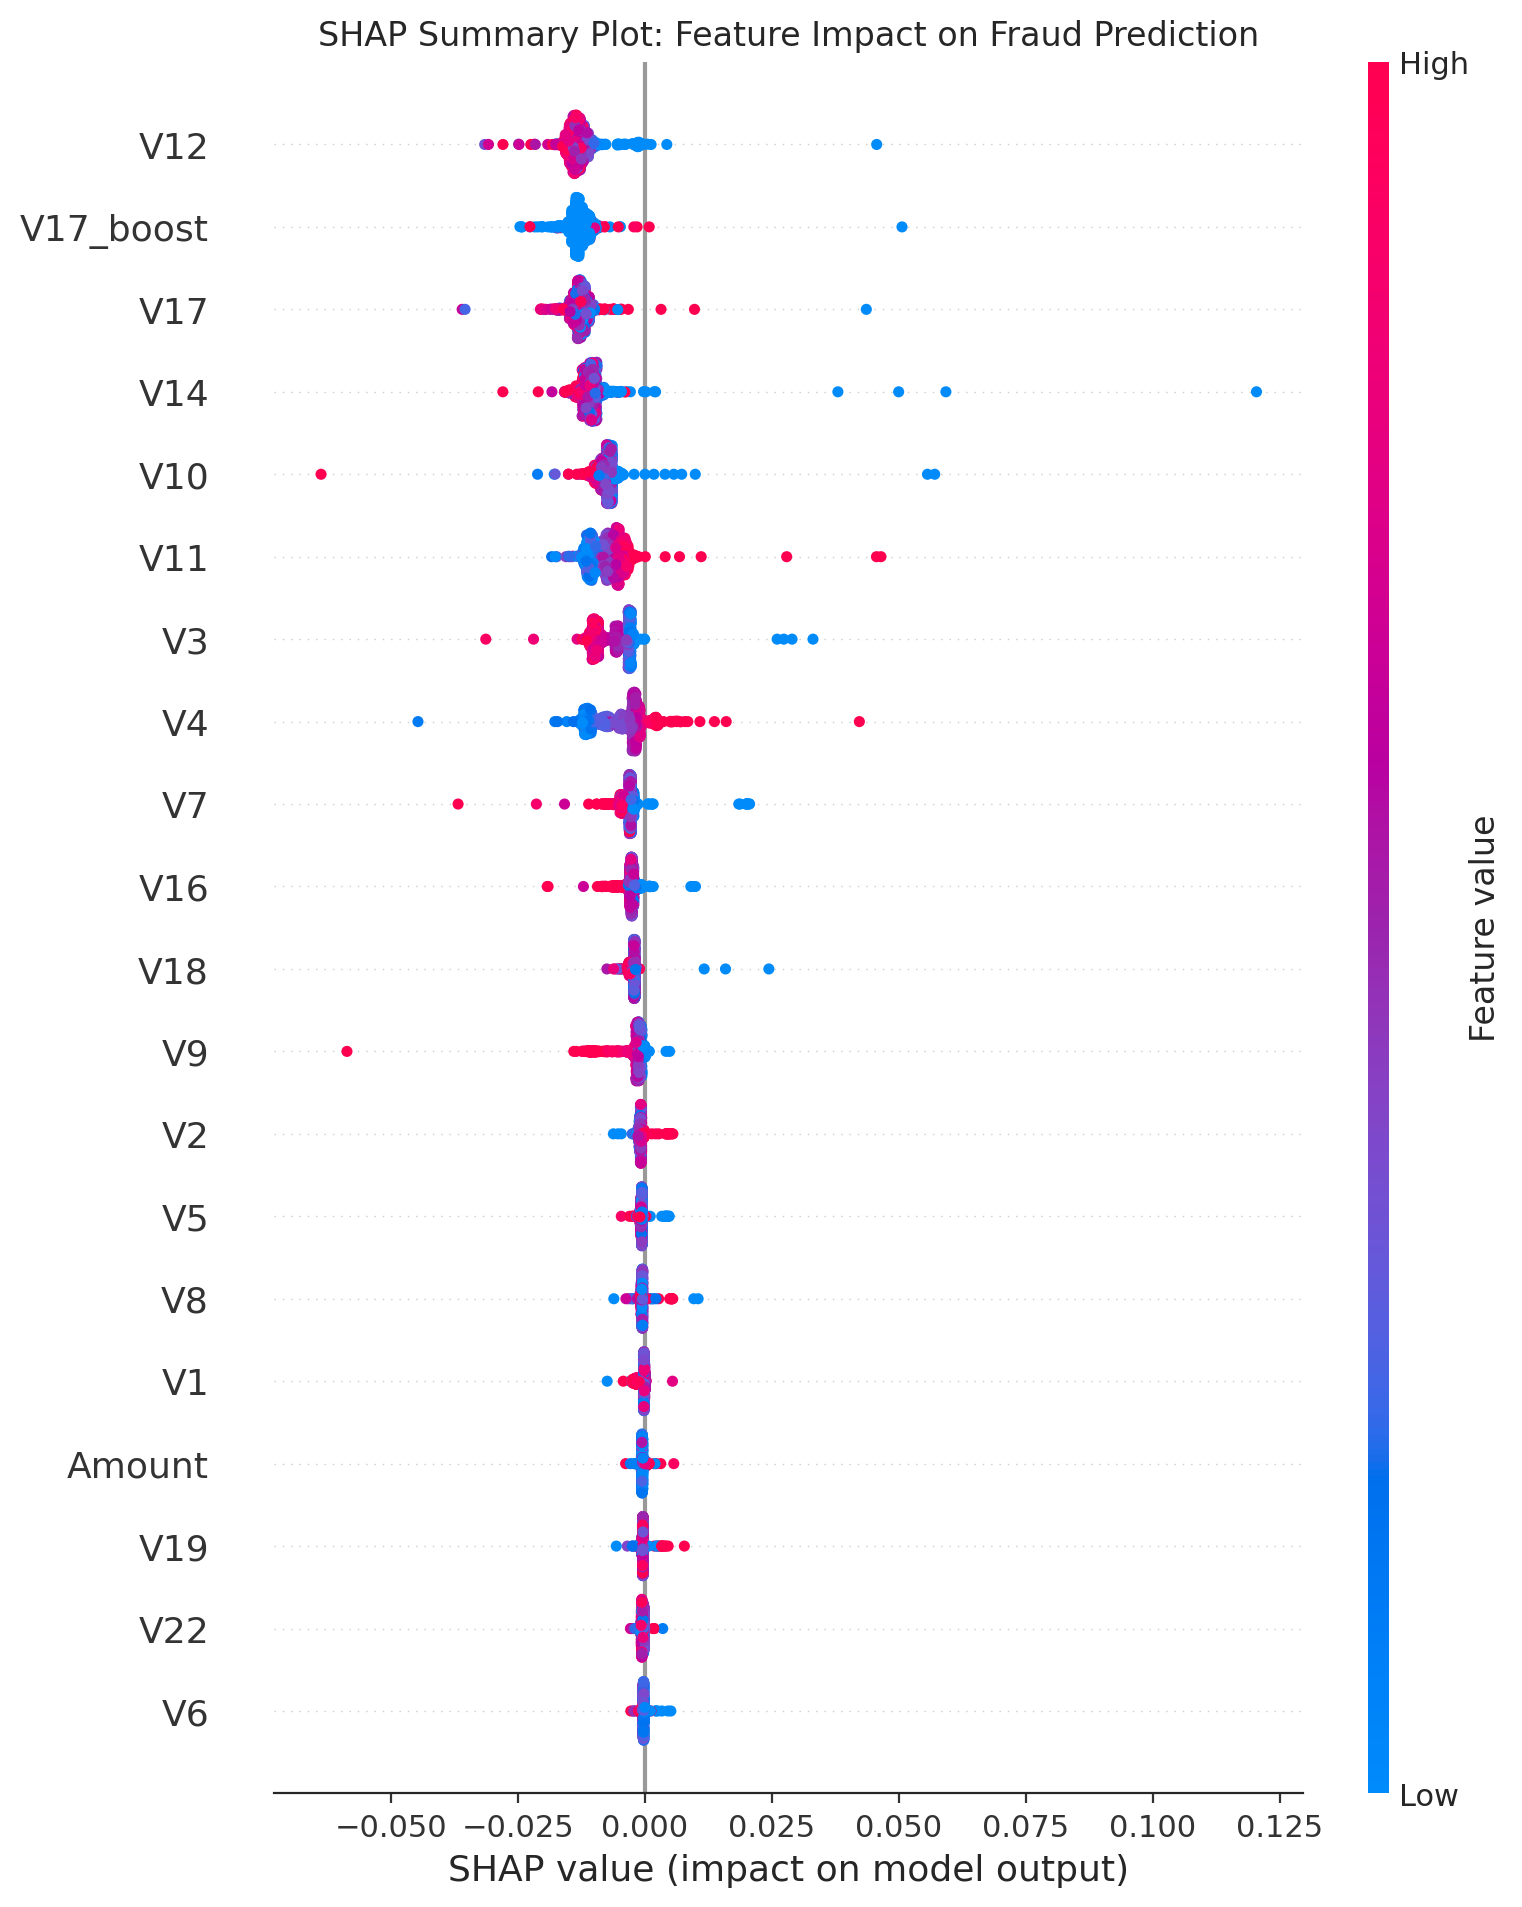

In [56]:
# SHAP summary plot
print("\nSHAP Summary Plot (Detailed):")
shap_values_class_1 = shap_values[:, :, 1]
shap.summary_plot(shap_values_class_1, X_test_sample, show=False)
plt.title('SHAP Summary Plot: Feature Impact on Fraud Prediction')
plt.show()

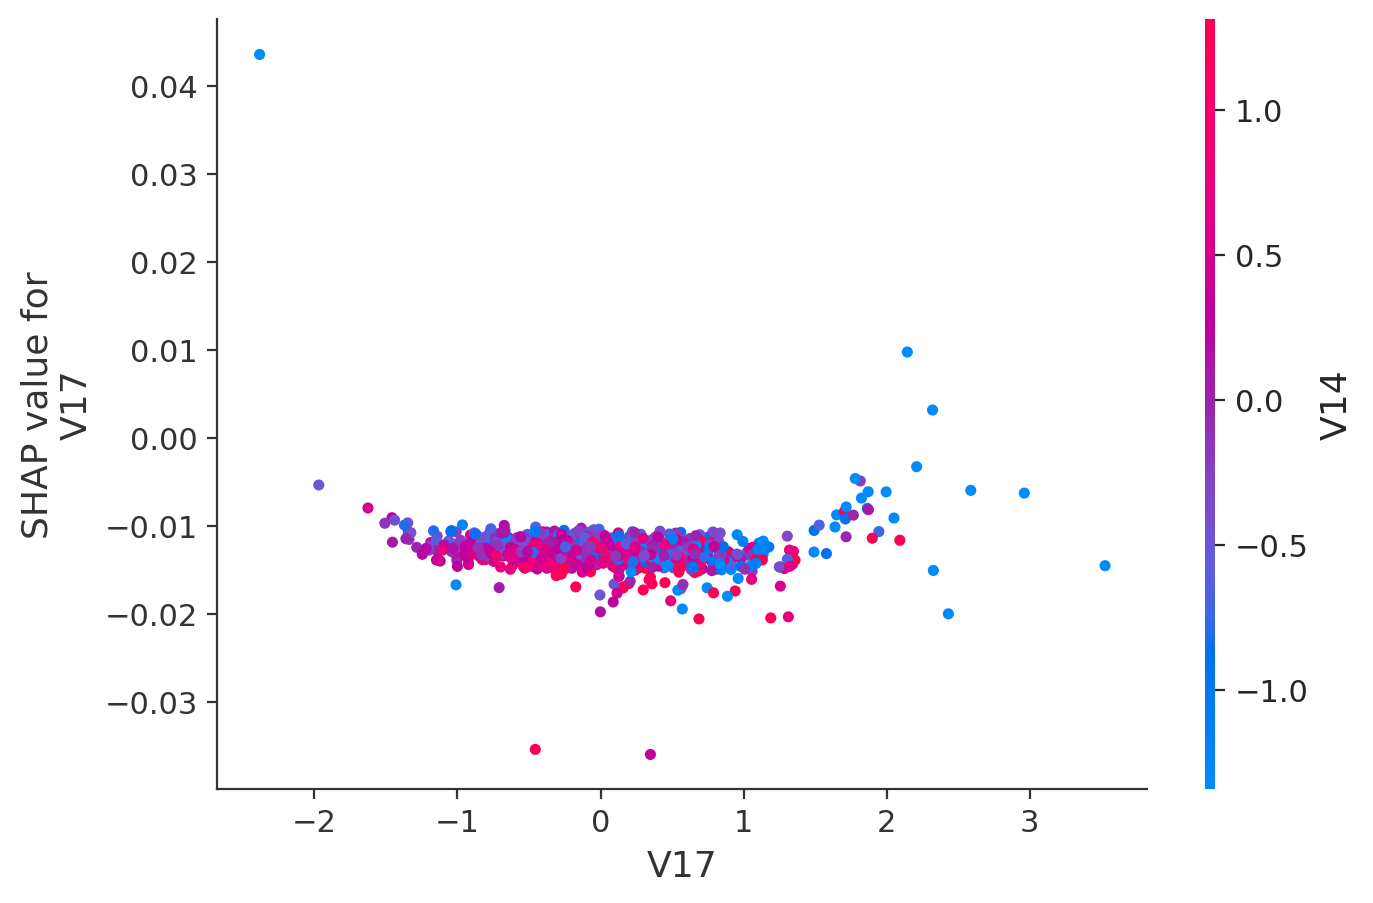

In [57]:
# SHAP dependence plot for V17 vs. V14
shap.dependence_plot("V17", shap_values_class_1, X_test_sample, interaction_index="V14")

In [58]:
# SHAP force plot for a single fraud prediction
fraud_indices = y_test[y_test == 1].index
fraud_sample = X_test.loc[fraud_indices].sample(1, random_state=42).copy()
fraud_sample = fraud_sample[X_train_bal.columns]
fraud_shap_values = explainer.shap_values(fraud_sample)

In [59]:
# Extract SHAP values for class 1 for the single sample
fraud_shap_values_class_1 = fraud_shap_values[0][:, 1]


SHAP Force Plot for a Single Fraud Prediction:


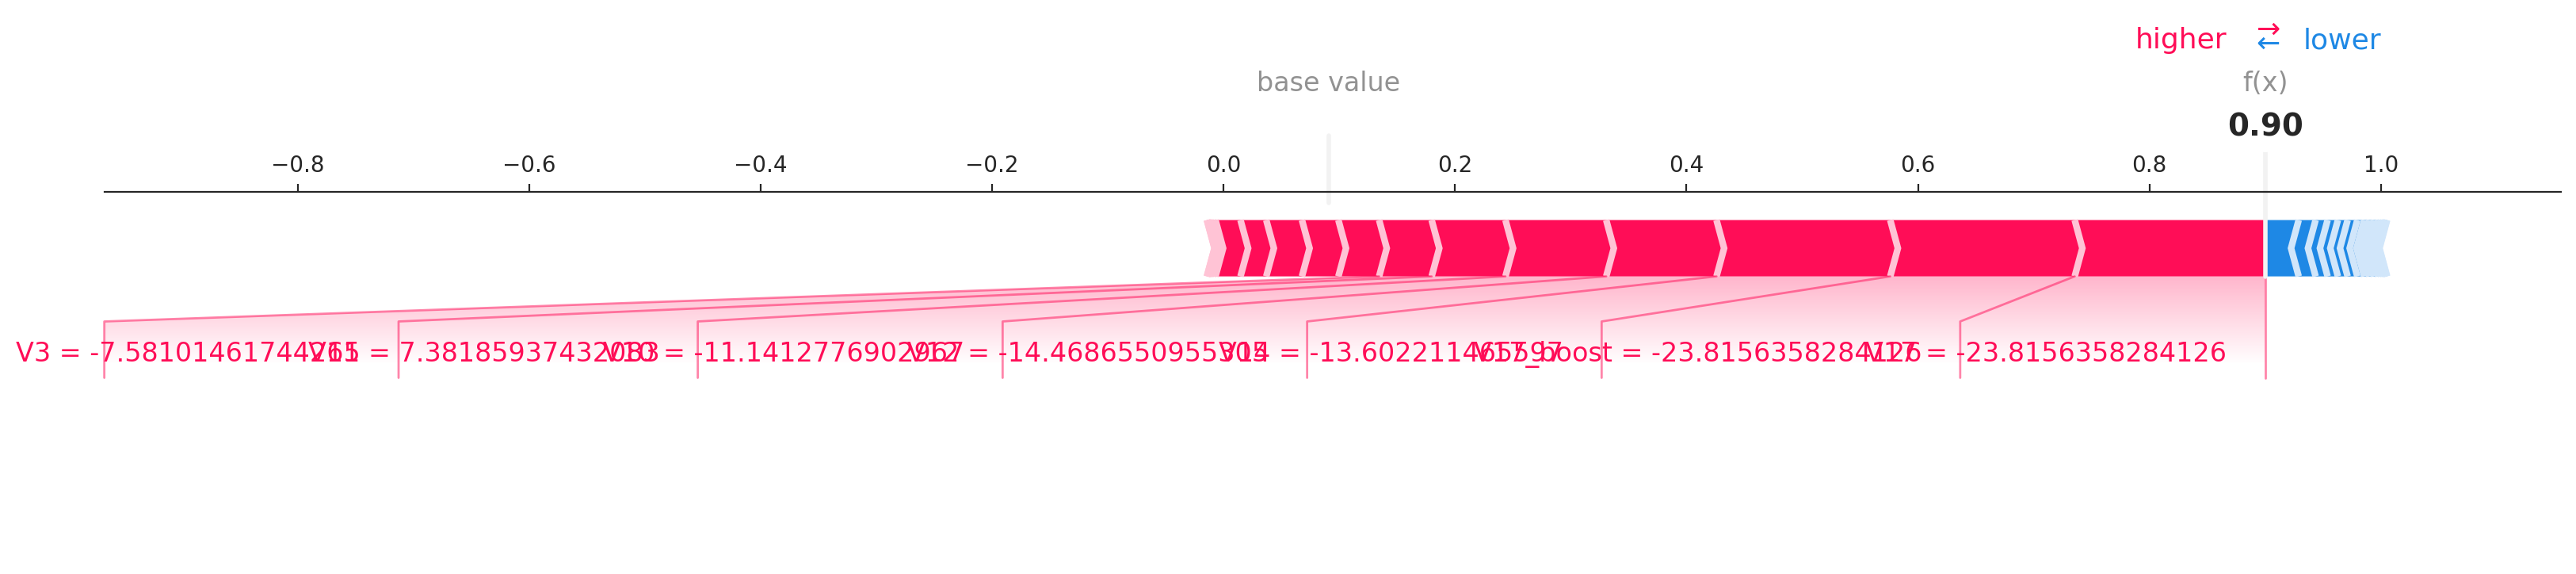

In [60]:
print("\nSHAP Force Plot for a Single Fraud Prediction:")
shap.force_plot(explainer.expected_value[1], fraud_shap_values_class_1, fraud_sample, matplotlib=True)
plt.show()

In [61]:
# SHAP force plot for a single non-fraud prediction
non_fraud_indices = y_test[y_test == 0].index
non_fraud_sample = X_test.loc[non_fraud_indices].sample(1, random_state=42).copy()
non_fraud_sample = non_fraud_sample[X_train_bal.columns]
non_fraud_shap_values = explainer.shap_values(non_fraud_sample)
non_fraud_shap_values_class_1 = non_fraud_shap_values[0][:, 1]


SHAP Force Plot for a Single Non-Fraud Prediction:


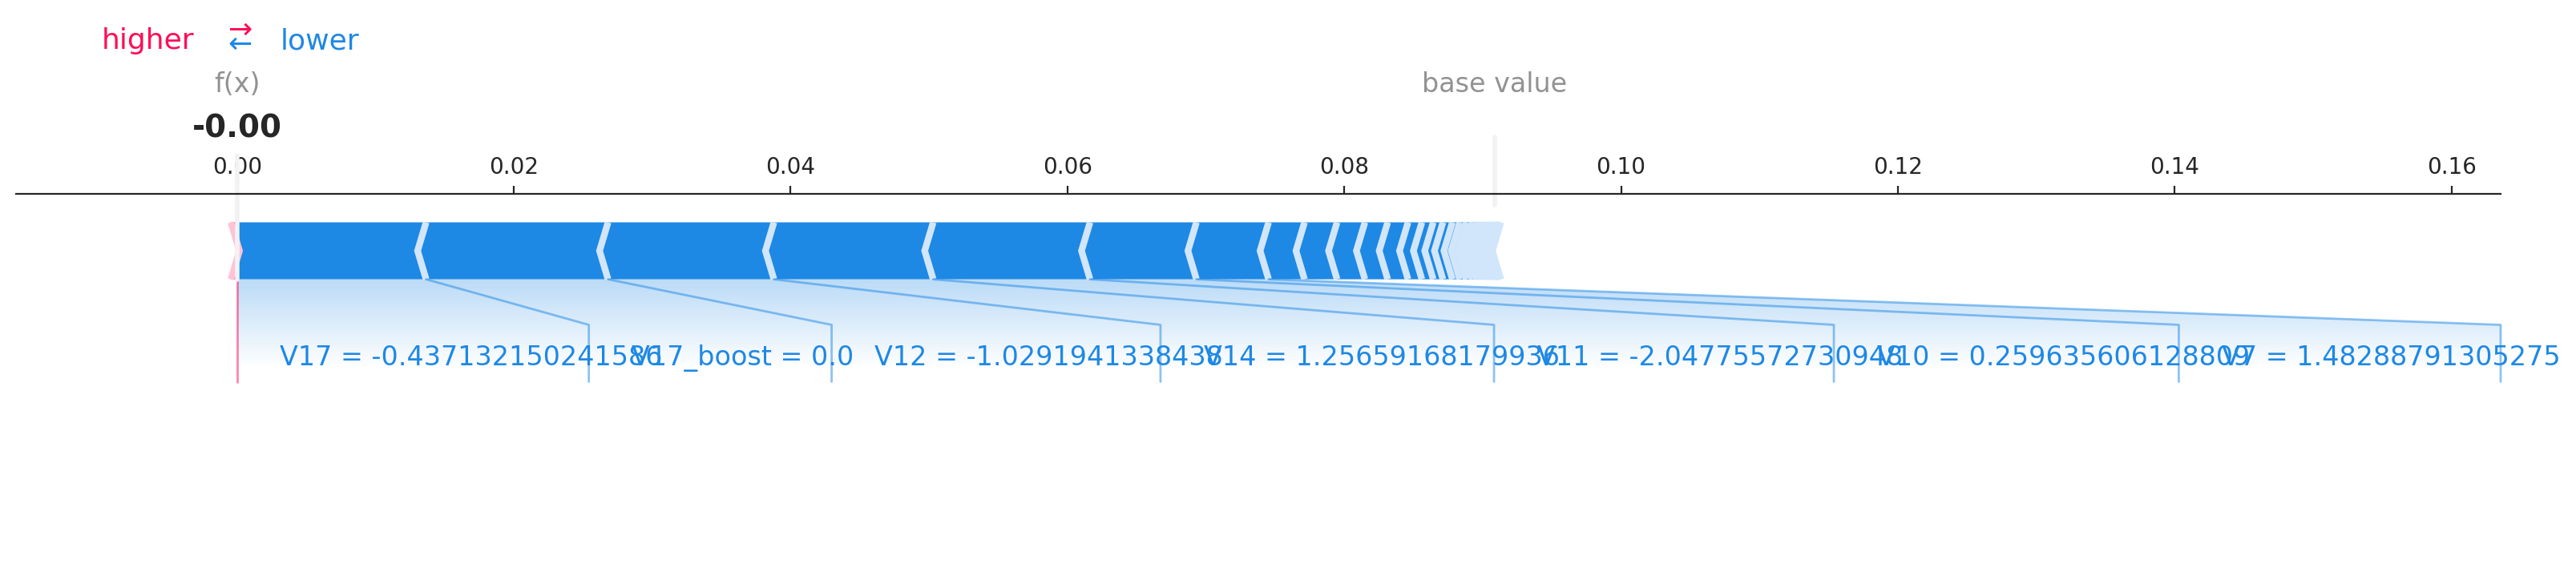

In [62]:
print("\nSHAP Force Plot for a Single Non-Fraud Prediction:")
shap.force_plot(explainer.expected_value[1], non_fraud_shap_values_class_1, non_fraud_sample, matplotlib=True)
plt.show()

In [63]:
from sklearn.inspection import PartialDependenceDisplay


Partial Dependence Plot for V17:


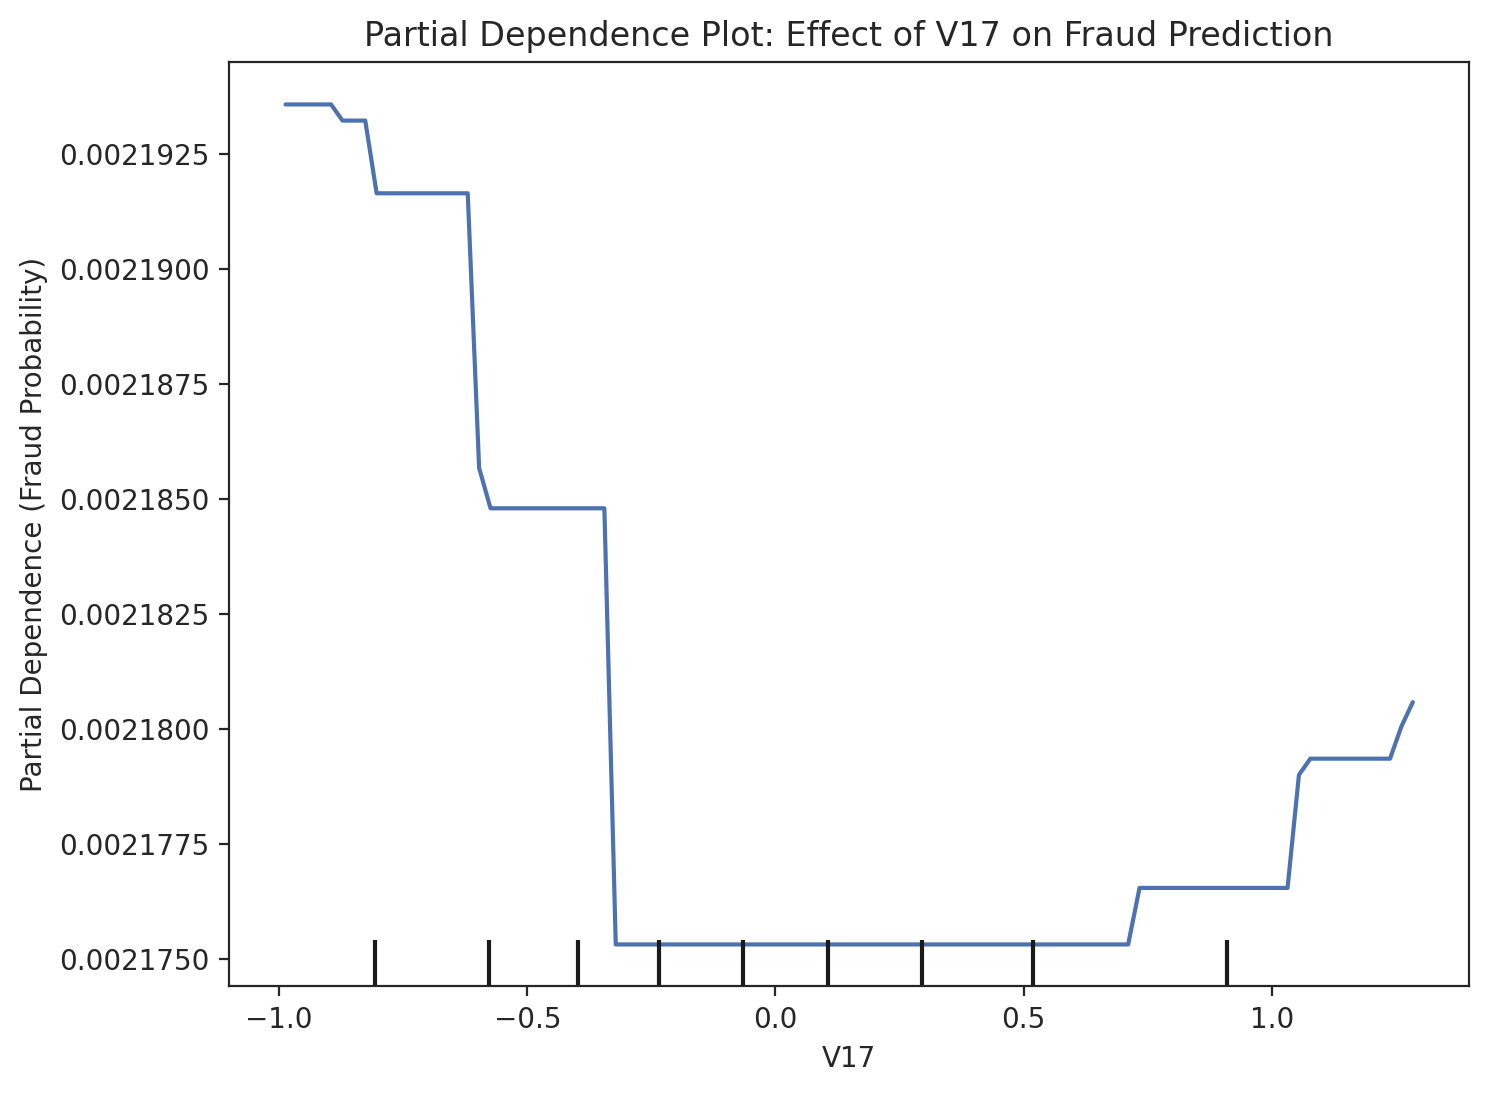

In [64]:
# Partial Dependence Plot for V17
print("\nPartial Dependence Plot for V17:")
fig, ax = plt.subplots(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(
    best_model,
    X_test,
    features=['V17'],
    ax=ax
)
plt.title('Partial Dependence Plot: Effect of V17 on Fraud Prediction')
plt.xlabel('V17')
plt.ylabel('Partial Dependence (Fraud Probability)')
plt.show()

## Model Deployment Considerations

In [66]:
# Select the best model (RF) and its best threshold
best_model = models['RF']
best_threshold = best_thresholds['RF']

In [67]:
# Define a prediction function for deployment
def predict_fraud(transaction, model, threshold, feature_names):
    if isinstance(transaction, dict):
        transaction_df = pd.DataFrame([transaction])
    else:
        transaction_df = pd.DataFrame([transaction], columns=feature_names[:30])

    # Preprocess the transaction
    threshold_v17 = X_train['V17'].abs().quantile(0.95)
    transaction_df['V17_boost'] = transaction_df['V17'].where(transaction_df['V17'].abs() > threshold_v17, 0)
    transaction_df['Time_cycle'] = np.sin(2 * np.pi * transaction_df['Time'] / (48 * 3600))
    amount_cap = X_train['Amount'].quantile(0.99)
    transaction_df['Log_Amount'] = np.log1p(transaction_df['Amount'].clip(upper=amount_cap))

    transaction_df = transaction_df[feature_names]

    fraud_prob = model.predict_proba(transaction_df)[:, 1][0]
    is_fraud = fraud_prob >= threshold

    return is_fraud, fraud_prob

In [68]:
# Prediction function
feature_names = X_train_bal.columns.tolist()
fraud_sample = X_test[y_test == 1].sample(1, random_state=42).to_dict(orient='records')[0]
is_fraud, fraud_prob = predict_fraud(fraud_sample, best_model, best_threshold, feature_names)
print("\nSample Transaction (Fraud):")
print(f"Is Fraud: {is_fraud}, Fraud Probability: {fraud_prob:.3f}")


Sample Transaction (Fraud):
Is Fraud: True, Fraud Probability: 0.900


In [69]:
non_fraud_sample = X_test[y_test == 0].sample(1, random_state=42).to_dict(orient='records')[0]
is_fraud, fraud_prob = predict_fraud(non_fraud_sample, best_model, best_threshold, feature_names)
print("\nSample Transaction (Non-Fraud):")
print(f"Is Fraud: {is_fraud}, Fraud Probability: {fraud_prob:.3f}")


Sample Transaction (Non-Fraud):
Is Fraud: False, Fraud Probability: 0.000


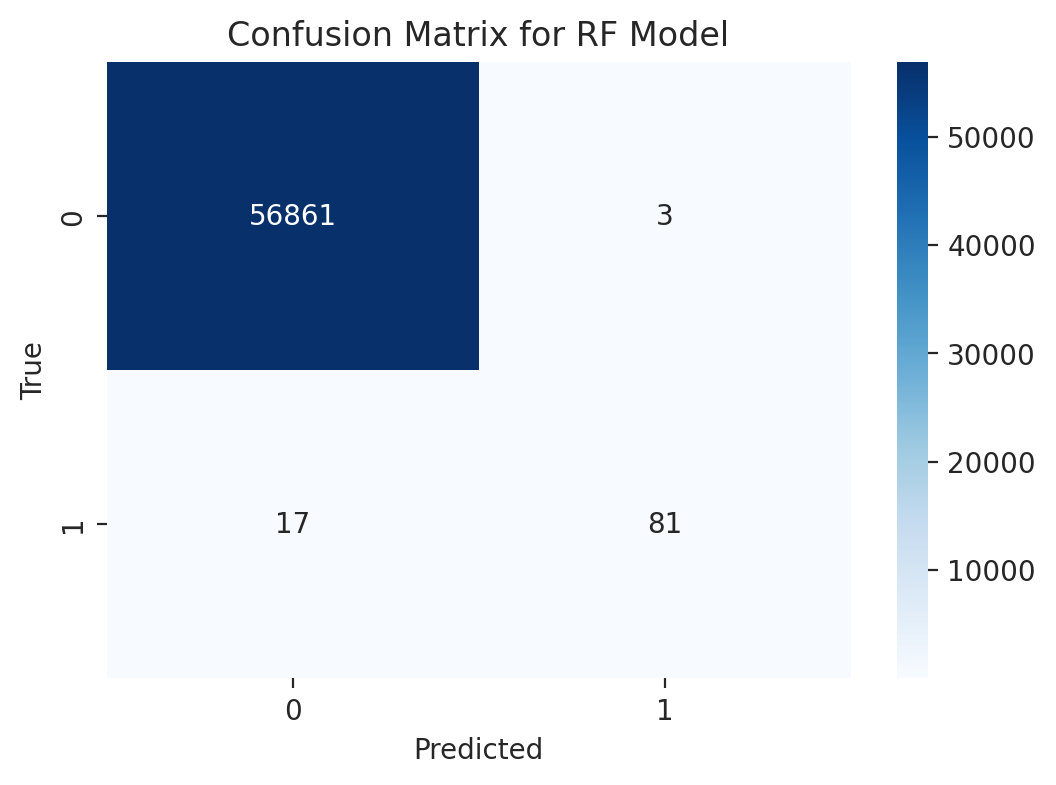

In [70]:
# Confusion Matrix Heatmap for RF
y_pred_proba = models['RF'].predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba >= best_thresholds['RF']).astype(int)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for RF Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()